In [ ]:
import nibabel as nib
import numpy as np
from scipy.ndimage import label
import os
from google.colab import drive

drive.mount('/content/drive')

input_folder = "/content/drive/MyDrive/BreastDM_nnUNet/predictions"
output_folder = "/content/drive/MyDrive/BreastDM_nnUNet/postprocessed_predictions"

os.makedirs(output_folder, exist_ok=True)

nii_files = [f for f in os.listdir(input_folder) if f.endswith('.nii') or f.endswith('.nii.gz')]

for file_name in nii_files:
    pred_path = os.path.join(input_folder, file_name)

    pred_img = nib.load(pred_path)
    pred_data = pred_img.get_fdata().astype(np.uint8)

    labeled, num_features = label(pred_data)

    if num_features > 0:
        largest_label = np.argmax(np.bincount(labeled.flat)[1:]) + 1
        largest_component = (labeled == largest_label)
    else:
        largest_component = np.zeros_like(pred_data)

    cleaned_img = nib.Nifti1Image(largest_component.astype(np.uint8), pred_img.affine)
    cleaned_name = "postprocessed_" + file_name.replace('.nii', '').replace('.gz', '') + ".nii.gz"
    nib.save(cleaned_img, os.path.join(output_folder, cleaned_name))

    print(f"Processed: {file_name} → {cleaned_name}")


In [ ]:
import os
import nibabel as nib
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

true_mask_dir = "/content/drive/MyDrive/BreastDM_nnUNet/Dataset001_BreastCancer/labelsTr"
predicted_dir = "/content/drive/MyDrive/BreastDM_nnUNet/predictions"

def compute_metrics(true_mask, pred_mask):
    true_flat = true_mask.flatten()
    pred_flat = pred_mask.flatten()

    TP = np.sum((true_flat == 1) & (pred_flat == 1))
    FP = np.sum((true_flat == 0) & (pred_flat == 1))
    FN = np.sum((true_flat == 1) & (pred_flat == 0))

    dice = (2 * TP) / (2 * TP + FP + FN + 1e-8)
    iou = TP / (TP + FP + FN + 1e-8)
    ppv = TP / (TP + FP + 1e-8)

    return dice, iou, ppv

dice_scores = []
iou_scores = []
ppv_scores = []

for true_file in os.listdir(true_mask_dir):
    if true_file.endswith(".nii") or true_file.endswith(".nii.gz"):
        base_name = os.path.splitext(true_file)[0].split(".")[0]
        pred_file = f"{base_name}.nii.gz"
        true_path = os.path.join(true_mask_dir, true_file)
        pred_path = os.path.join(predicted_dir, pred_file)

        if os.path.exists(pred_path):
            true_data = nib.load(true_path).get_fdata().astype(np.uint8)
            pred_data = nib.load(pred_path).get_fdata().astype(np.uint8)

            if true_data.shape == pred_data.shape:
                dice, iou, ppv = compute_metrics(true_data, pred_data)
                dice_scores.append(dice)
                iou_scores.append(iou)
                ppv_scores.append(ppv)

                print(f"{base_name} Dice: {dice:.4f}, IoU: {iou:.4f}, PPV: {ppv:.4f}")
            else:
                print(f"Shape mismatch for {base_name}")

print("\n Mean Metrics Across Dataset:")
print(f" Mean Dice Score: {np.mean(dice_scores):.4f}")
print(f" Mean IoU Score:  {np.mean(iou_scores):.4f}")
print(f" Mean PPV Score:  {np.mean(ppv_scores):.4f}")


Mounted at /content/drive
BC_002 Dice: 0.6461, IoU: 0.4772, PPV: 0.5094
BC_010 Dice: 0.6119, IoU: 0.4408, PPV: 0.4594
BC_026 Dice: 0.9433, IoU: 0.8926, PPV: 0.9315
BC_024 Dice: 0.9925, IoU: 0.9850, PPV: 0.9982
BC_035 Dice: 0.8992, IoU: 0.8168, PPV: 0.9030
BC_042 Dice: 0.8831, IoU: 0.7907, PPV: 0.8923
BC_048 Dice: 0.6562, IoU: 0.4883, PPV: 0.5894
BC_044 Dice: 0.7402, IoU: 0.5876, PPV: 0.6026
BC_051 Dice: 0.9601, IoU: 0.9232, PPV: 0.9524
BC_054 Dice: 0.8939, IoU: 0.8082, PPV: 0.9566
BC_055 Dice: 0.8515, IoU: 0.7413, PPV: 0.9373
BC_056 Dice: 0.4664, IoU: 0.3041, PPV: 0.3067
BC_061 Dice: 0.9113, IoU: 0.8370, PPV: 0.9567
BC_066 Dice: 0.9717, IoU: 0.9450, PPV: 0.9690
BC_067 Dice: 0.6701, IoU: 0.5039, PPV: 0.5361
BC_071 Dice: 0.9544, IoU: 0.9128, PPV: 0.9759
BC_070 Dice: 0.9645, IoU: 0.9314, PPV: 0.9796
BC_078 Dice: 0.8474, IoU: 0.7353, PPV: 0.7673
BC_084 Dice: 0.9052, IoU: 0.8269, PPV: 0.8925
BC_089 Dice: 0.8755, IoU: 0.7785, PPV: 0.8709
BC_092 Dice: 0.9714, IoU: 0.9444, PPV: 0.9569
BC_094 D

In [ ]:
import os
import nibabel as nib
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

true_mask_dir = "/content/drive/MyDrive/BreastDM_nnUNet/Dataset001_BreastCancer/labelsTr"
postprocessed_dir = "/content/drive/MyDrive/BreastDM_nnUNet/postprocessed_predictions"

def compute_metrics(true_mask, pred_mask):
    true_flat = true_mask.flatten()
    pred_flat = pred_mask.flatten()

    TP = np.sum((true_flat == 1) & (pred_flat == 1))
    FP = np.sum((true_flat == 0) & (pred_flat == 1))
    FN = np.sum((true_flat == 1) & (pred_flat == 0))

    dice = (2 * TP) / (2 * TP + FP + FN + 1e-8)
    iou = TP / (TP + FP + FN + 1e-8)
    ppv = TP / (TP + FP + 1e-8)

    return dice, iou, ppv

dice_scores = []
iou_scores = []
ppv_scores = []

for true_file in os.listdir(true_mask_dir):
    if true_file.endswith(".nii") or true_file.endswith(".nii.gz"):
        base_name = os.path.splitext(true_file)[0].split(".")[0]
        post_file = f"postprocessed_{base_name}.nii.gz"
        true_path = os.path.join(true_mask_dir, true_file)
        post_path = os.path.join(postprocessed_dir, post_file)

        if os.path.exists(post_path):
            true_data = nib.load(true_path).get_fdata().astype(np.uint8)
            pred_data = nib.load(post_path).get_fdata().astype(np.uint8)

            if true_data.shape == pred_data.shape:
                dice, iou, ppv = compute_metrics(true_data, pred_data)
                dice_scores.append(dice)
                iou_scores.append(iou)
                ppv_scores.append(ppv)

                print(f"{base_name} Dice: {dice:.4f}, IoU: {iou:.4f}, PPV: {ppv:.4f}")
            else:
                print(f"Shape mismatch for {base_name}")

print("\n Mean Metrics Across Dataset:")
print(f" Mean Dice Score: {np.mean(dice_scores):.4f}")
print(f" Mean IoU Score:  {np.mean(iou_scores):.4f}")
print(f" Mean PPV Score:  {np.mean(ppv_scores):.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
BC_002 Dice: 0.9189, IoU: 0.8500, PPV: 0.9577
BC_010 Dice: 0.0000, IoU: 0.0000, PPV: 0.0000
BC_026 Dice: 0.9433, IoU: 0.8926, PPV: 0.9315
BC_024 Dice: 0.9925, IoU: 0.9850, PPV: 0.9982
BC_035 Dice: 0.8992, IoU: 0.8168, PPV: 0.9030
BC_042 Dice: 0.8831, IoU: 0.7907, PPV: 0.8923
BC_048 Dice: 0.8461, IoU: 0.7333, PPV: 0.9877
BC_044 Dice: 0.8720, IoU: 0.7731, PPV: 0.7992
BC_051 Dice: 0.9601, IoU: 0.9232, PPV: 0.9524
BC_054 Dice: 0.8939, IoU: 0.8082, PPV: 0.9566
BC_055 Dice: 0.8515, IoU: 0.7413, PPV: 0.9373
BC_061 Dice: 0.9113, IoU: 0.8370, PPV: 0.9567
BC_066 Dice: 0.9717, IoU: 0.9450, PPV: 0.9690
BC_067 Dice: 0.9152, IoU: 0.8436, PPV: 0.9385
BC_071 Dice: 0.9544, IoU: 0.9128, PPV: 0.9759
BC_070 Dice: 0.9645, IoU: 0.9314, PPV: 0.9796
BC_078 Dice: 0.8754, IoU: 0.7785, PPV: 0.8265
BC_084 Dice: 0.9405, IoU: 0.8876, PPV: 0.9637
BC_089 Dice: 0.8758, IoU: 0.7790, PPV: 0.87

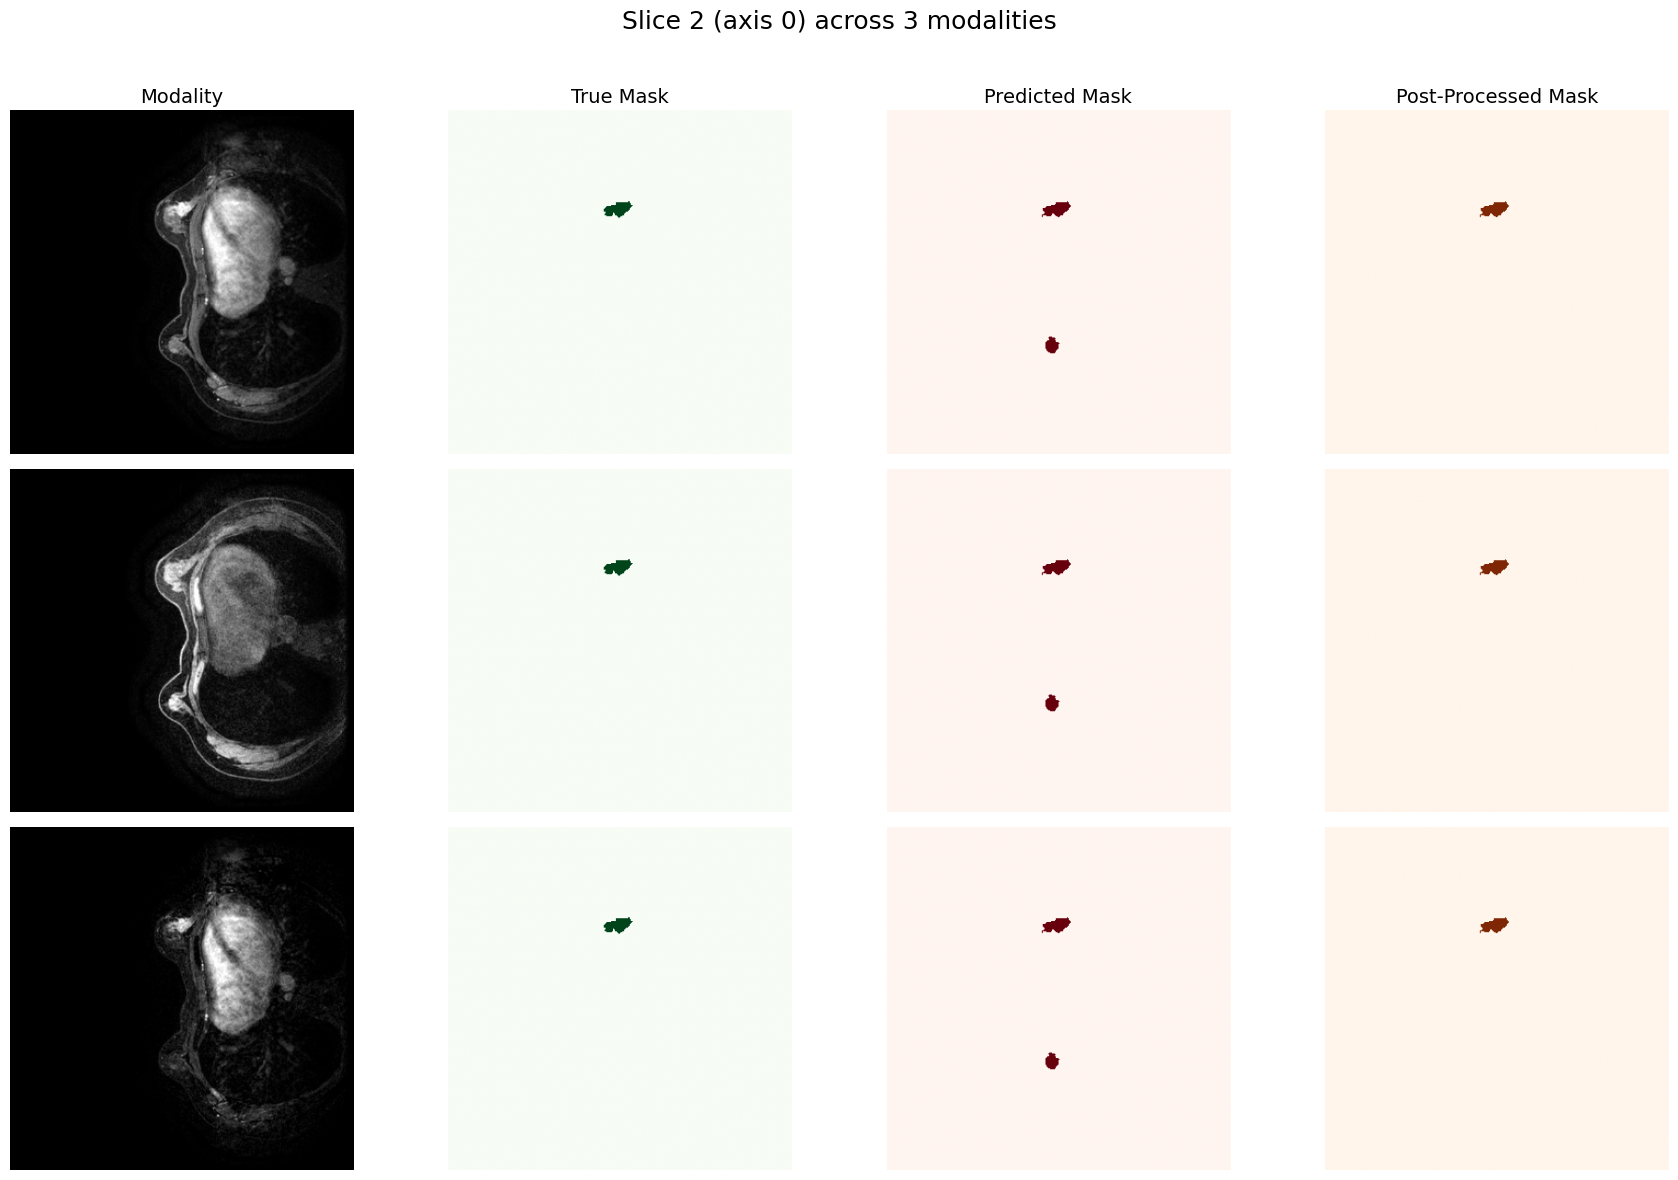

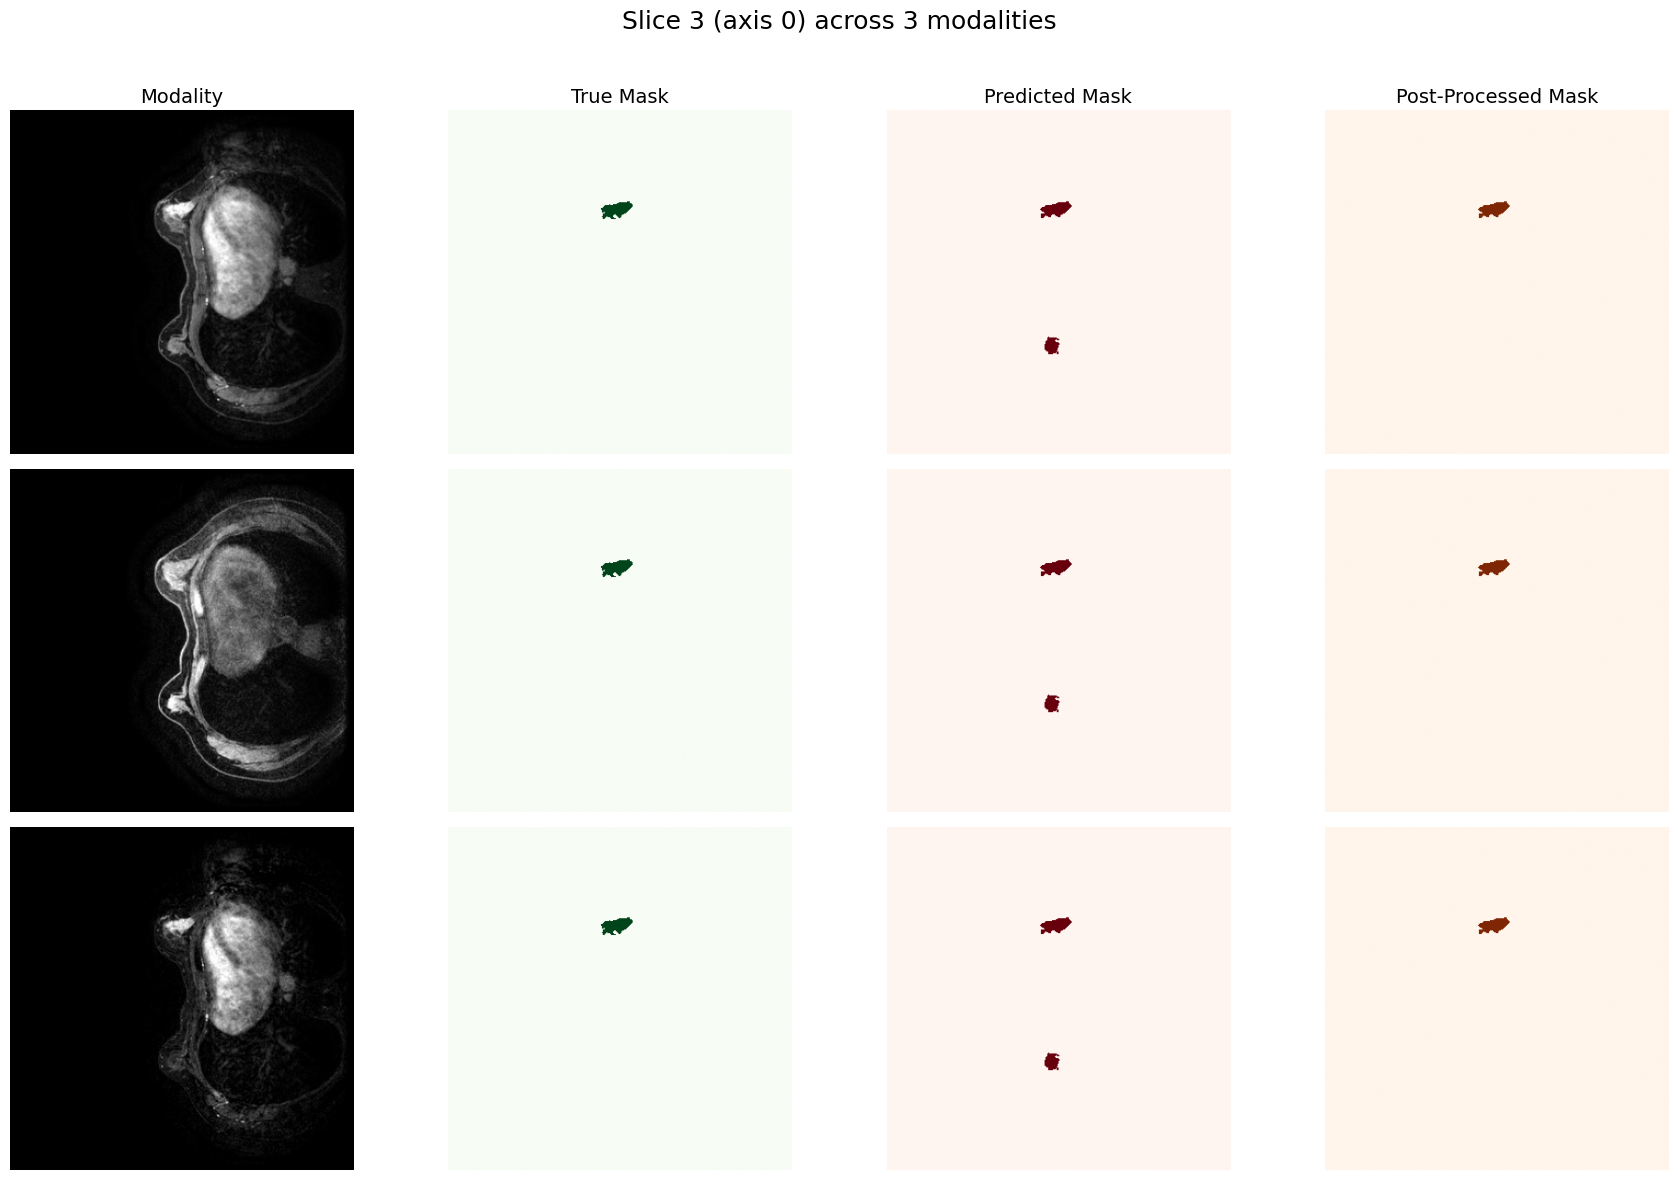

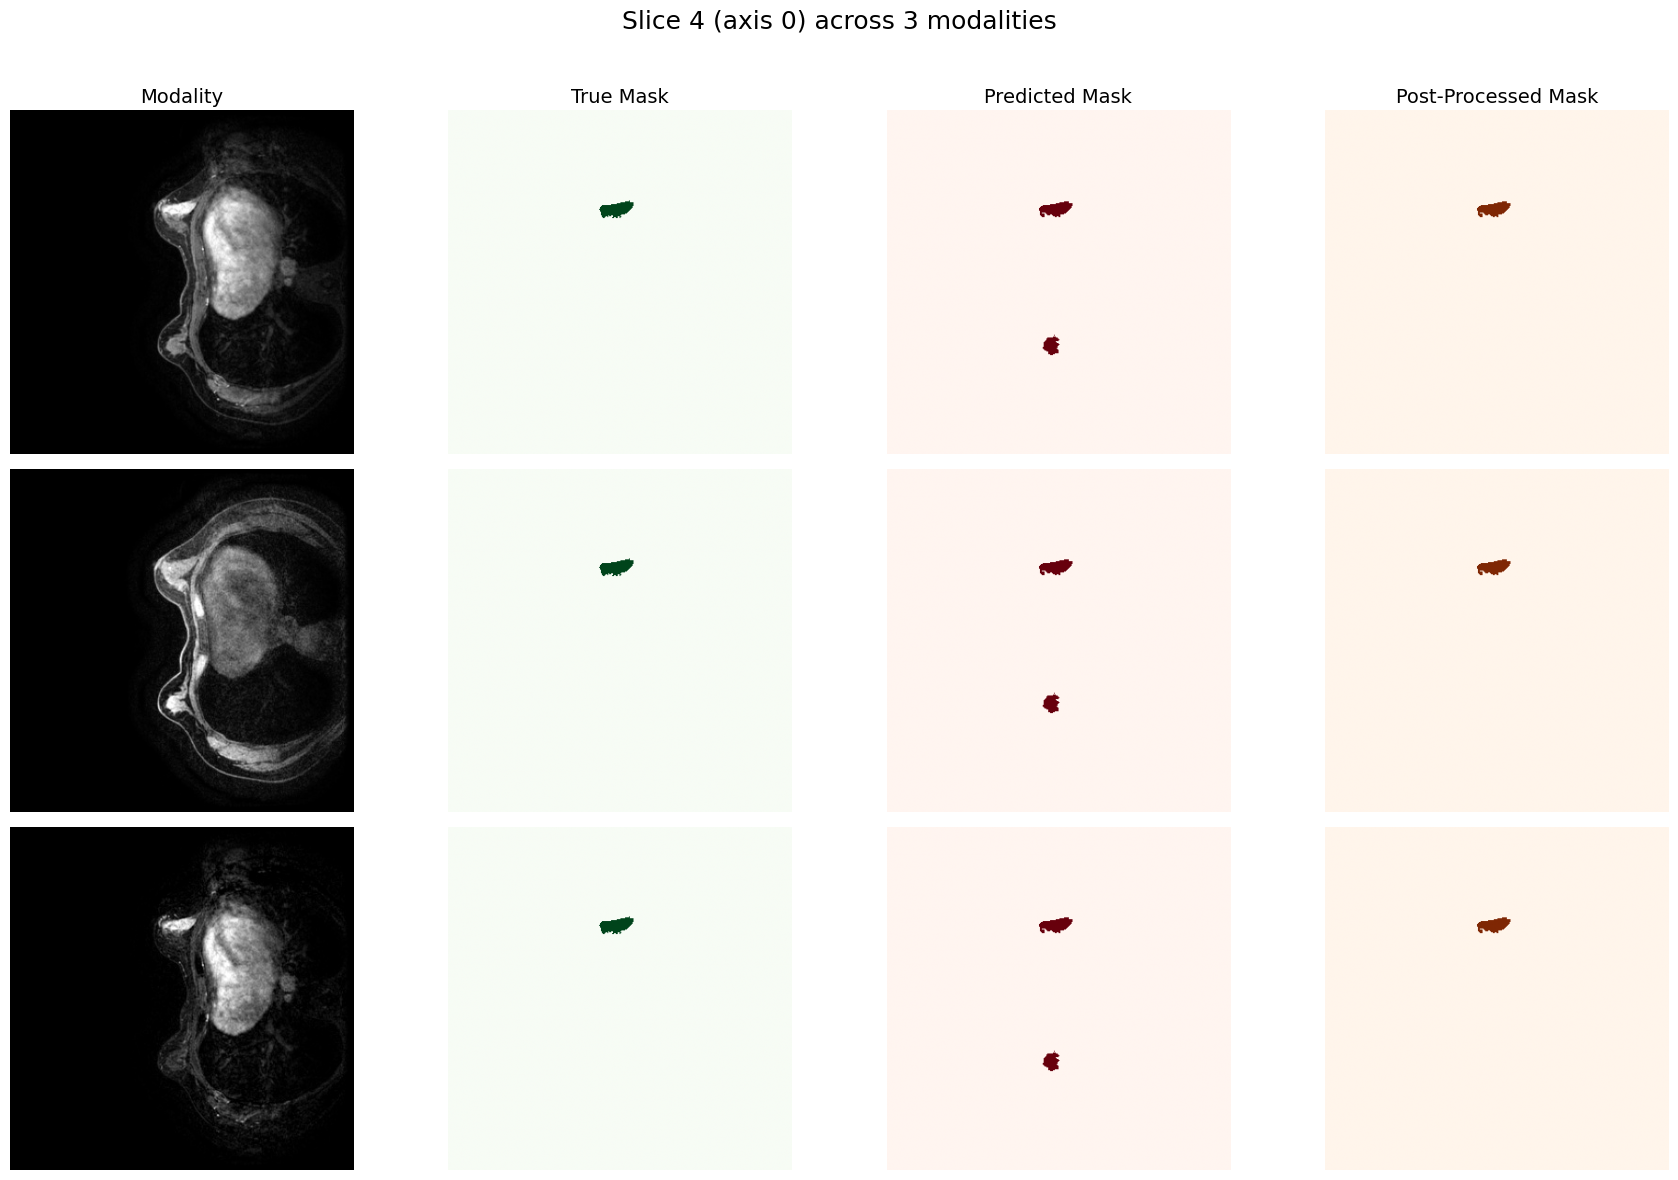

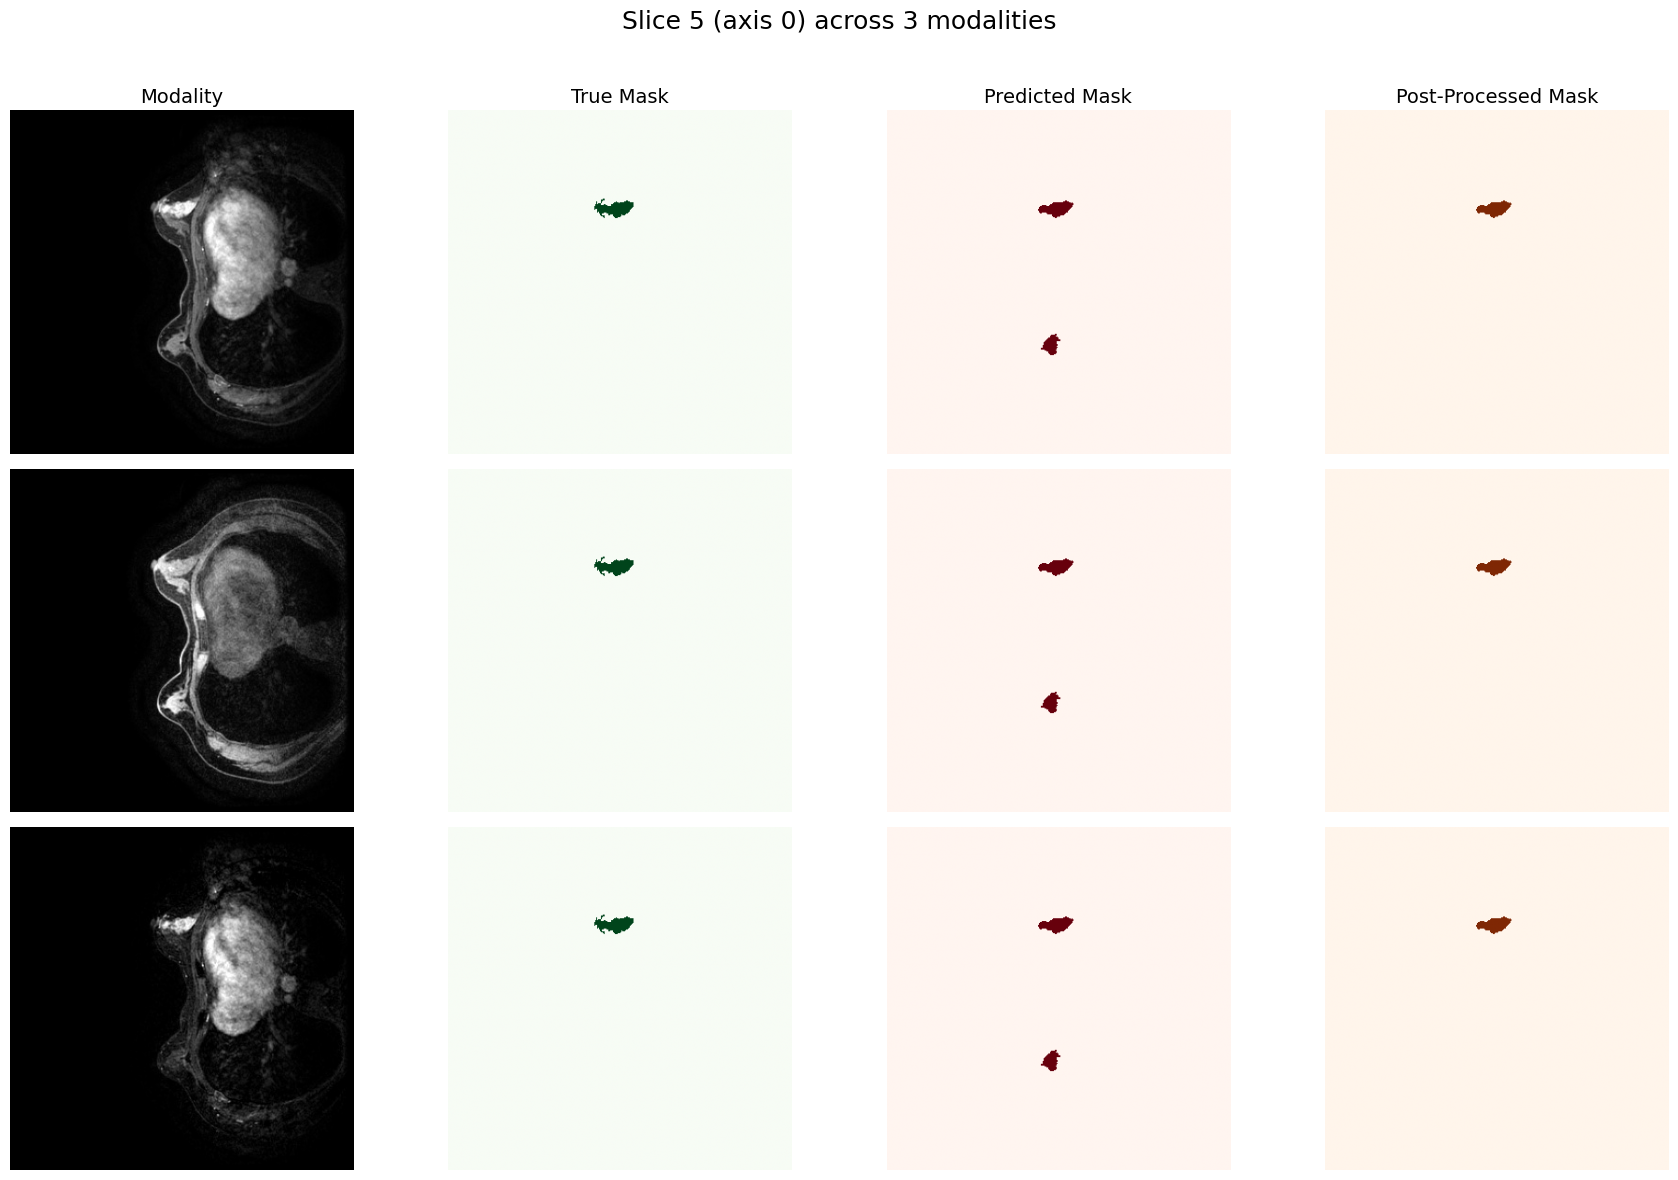

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

modality_paths = [
    "/content/drive/MyDrive/BreastDM_nnUNet/Dataset001_BreastCancer/imagesTr/BC_048_0000.nii.gz",
    "/content/drive/MyDrive/BreastDM_nnUNet/Dataset001_BreastCancer/imagesTr/BC_048_0001.nii.gz",
    "/content/drive/MyDrive/BreastDM_nnUNet/Dataset001_BreastCancer/imagesTr/BC_048_0002.nii.gz"
]

true_mask_path = "/content/drive/MyDrive/BreastDM_nnUNet/Dataset001_BreastCancer/labelsTr/BC_048.nii.gz"
pred_mask_path = "/content/drive/MyDrive/BreastDM_nnUNet/predictions/BC_048.nii.gz"
post_mask_path = "/content/drive/MyDrive/BreastDM_nnUNet/postprocessed_predictions/postprocessed_BC_048.nii.gz"


modalities = [nib.load(path).get_fdata() for path in modality_paths]

true_mask = nib.load(true_mask_path).get_fdata()
pred_mask = nib.load(pred_mask_path).get_fdata()
post_mask = nib.load(post_mask_path).get_fdata()

axis = 0
total_slices = modalities[0].shape[axis]
num_slices = 4
mode = 'middle'

if mode == 'start':
    indices = list(range(num_slices))
elif mode == 'end':
    indices = list(range(total_slices - num_slices, total_slices))
else:
    start = (total_slices - num_slices) // 2
    indices = list(range(start, start + num_slices))

view_titles = ['Modality', 'True Mask', 'Predicted Mask', 'Post-Processed Mask']
mask_cmaps = ['gray', 'Greens', 'Reds', 'Oranges']

for idx in indices:
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
    fig.suptitle(f'Slice {idx} (axis {axis}) across 3 modalities', fontsize=18)

    for row, mod in enumerate(modalities):
        if axis == 0:
            img_slice = mod[idx, :, :]
            true_slice = true_mask[idx, :, :]
            pred_slice = pred_mask[idx, :, :]
            post_slice = post_mask[idx, :, :]
        elif axis == 1:
            img_slice = mod[:, idx, :]
            true_slice = true_mask[:, idx, :]
            pred_slice = pred_mask[:, idx, :]
            post_slice = post_mask[:, idx, :]
        else:
            img_slice = mod[:, :, idx]
            true_slice = true_mask[:, :, idx]
            pred_slice = pred_mask[:, :, idx]
            post_slice = post_mask[:, :, idx]

        slices = [img_slice, true_slice, pred_slice, post_slice]

        for col, (slc, title, cmap) in enumerate(zip(slices, view_titles, mask_cmaps)):
            ax = axes[row, col]
            ax.imshow(slc.T, cmap=cmap, origin='lower')
            if row == 0:
                ax.set_title(title, fontsize=14)
            ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
